# Data Description:
**MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.**


# Learning Outcomes:

**Exploratory Data Analysis**

**Visualization using Python**

**Pandas**


# File Import

Importing different type of files.

**Seperated by '\t'**

In [57]:
import pandas as pd
Columns= ["user id","item id","rating","timestamp"]
ratings = pd.read_csv("u.data", sep='\t',names=Columns)
print(ratings.shape)
ratings.head()

(100000, 4)


,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [58]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [60]:
ratings.isnull().sum() #missing value check

user id      0
item id      0
rating       0
timestamp    0
dtype: int64

**Seperated by '|'**

In [85]:
col_n = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']

movies=pd.read_csv("u.item",encoding = 'latin-1',sep='|',names=col_n)
print(movies.shape)
movies.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

Dropping irrelevant columns

In [86]:
movies.drop(columns=['video release date','IMDb URL'],inplace=True)

Analyzing genre column

In [75]:
li=[]
for i in movies.loc[:,'unknown':'Western'].columns:
    b=movies[i].value_counts()[1]
    li.append(b)
print(li)
print(movies.loc[:,'unknown':'Western'].columns)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [77]:
#the unknown column has only 2 entries. let's look at them
movies[movies['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#let's see if there is information about the movieid 1373
ratings[ratings['item id'] == 1373]

,user id,item id,rating,timestamp
8567,181,1373,1,878962052


Since there is unknown column doesnt have a lot of info and the only movie associated with it was rated only once. We can remove that column.

In [91]:
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True) #dropping unknown row
movies.drop(columns= 'unknown',inplace=True) #dropping unknown column

In [92]:
movies.isnull().sum() #missing value check

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [93]:
print(movies.shape)
movies.head()

(1680, 21)


,movie id,movie title,release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [212]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item id       1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Children's    1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

**Seperated by ' '**

In [62]:
Columns= ["Total Records","Names"]
df1 = pd.read_csv("u.info",encoding = 'latin-1', sep=' ',names=Columns)
df1.head()

,Total Records,Names
0,943,users
1,1682,items
2,100000,ratings


**Seperated by '|'**

In [96]:
Columns= ["UserId","Age","Gender","Occupation","ZipCode"]
User = pd.read_csv("u.user", sep='|',names=Columns)
print(User.shape)
User.head()

(943, 5)


,UserId,Age,Gender,Occupation,ZipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [97]:
User.isnull().sum() #missing value check

UserId        0
Age           0
Gender        0
Occupation    0
ZipCode       0
dtype: int64

# UniVariant Analysis

**Ratings**

In [44]:
df.columns

Index(['user id', 'item id', 'rating', 'timestamp'], dtype='object')

In [45]:
df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

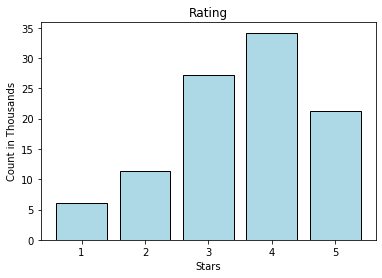

In [111]:
x=df['rating'].value_counts().index
y=[df['rating'].value_counts()[i]/1000 for i in x]
plt.bar(x,y,align='center',color='lightblue',edgecolor='black')
plt.xlabel('Stars')
plt.ylabel('Count in Thousands')
plt.title('Rating')
plt.show()

**Findings: Many users preferred rating 4**

**Age**

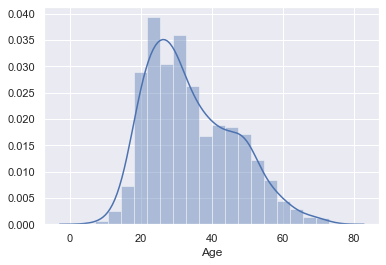

In [115]:
sns.set() #setting seaborn style to default
sns.distplot(User['Age'])

**Findings: Most of the people are between 30 to 35**

**Release_date**

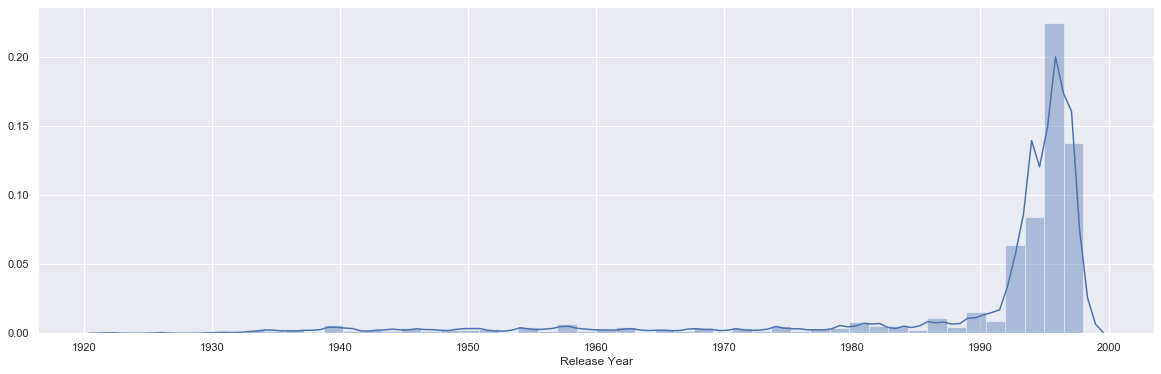

In [126]:
movies['Release Year']=movies['release date'].str.split('-',expand=True)[2] #Splitting Year from release date column
movies['Release Year']=movies['Release Year'].astype('int') #converting tdatatype to int
plt.figure(figsize=(20,6))
sns.distplot(movies['Release Year'])
plt.show()

**Findings: Most of the movies are lies between 1990 to 1999**

**Gender**

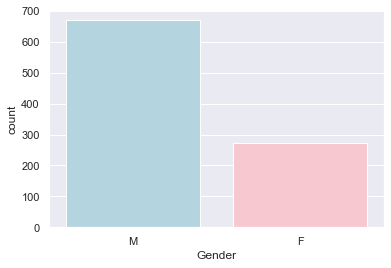

In [129]:
sns.countplot(User['Gender'],palette=['lightblue','pink'])

**Findings: Male users are more compared to female users**

**Occupation**

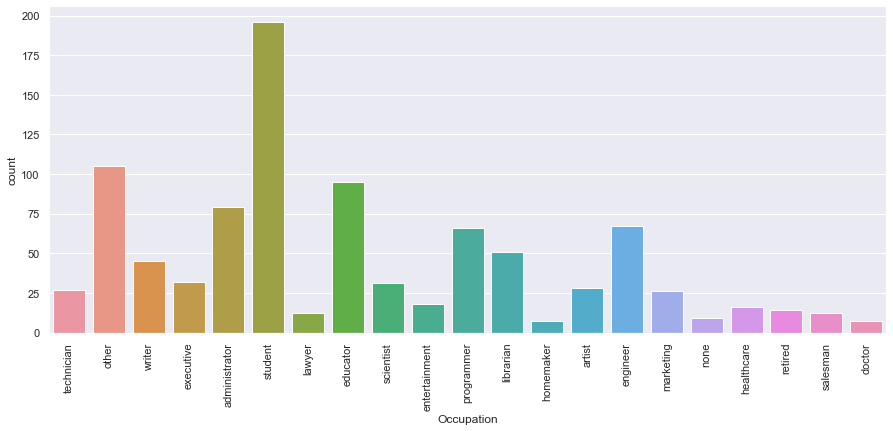

In [141]:
plt.figure(figsize=(15,6))
sns.countplot(User['Occupation'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Findings: It is Clearly Known that student's watch more movies than compared to others**

# Visualizing how popularity of genres has changed over the years

In [147]:
genre_by_year=movies.groupby('Release Year').sum().drop(columns='movie id').T
genre_by_year

Release Year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


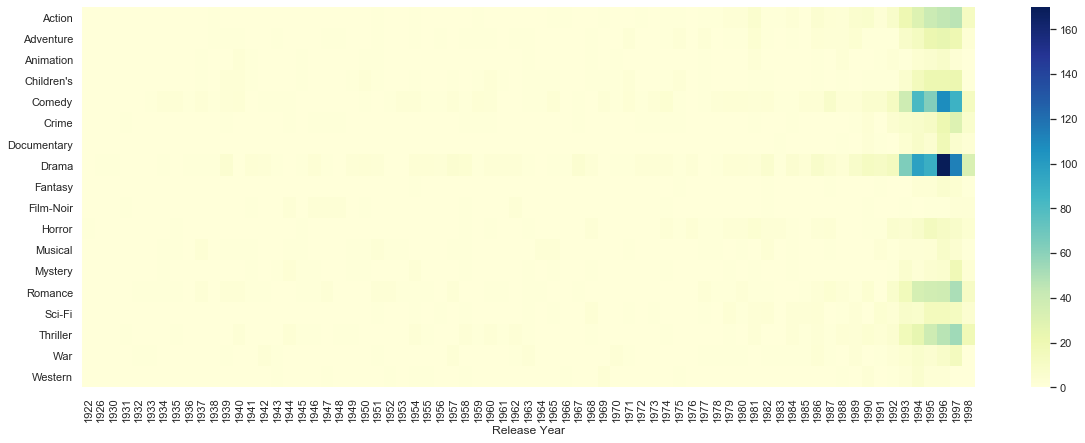

In [148]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

**Findings: It seems over the year people's genre choices changes a lot. The Dark color in above graph shows that in 1996 more number of 'Drama' movies are released.**

# Top 25 Movies with respect to ratings 
#  Note: We are considering movies with minimum 100 ratings

In [149]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [164]:
items = ratings.groupby('item id').count()

items = items[ratings.groupby('item id').count()['user id'] > 100].index

items = ratings.loc[ratings['item id'].isin(items)]

items = items.groupby('item id').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

In [167]:
rating_list = items.rating[0:25]

In [170]:
items=movies.loc[movies['movie id'].isin(order)]

In [173]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [175]:
top_25_movies = top_25_movies.reset_index()

In [176]:
top_25_movies['avg_rating'] =  rating_list.values

In [177]:
top_25_movies

,item id,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


# Verifying the assumptions

**We will verify  the belo assumptions(not based on statistical test)**

**1.Men watch more drama than women**

**2.Men watch more Romance than women**

**3.Women watch more sci-Fi than men**

In [192]:
print('Movies Columns:\n', movies.columns )
print(' ')
print('User Columns:\n ',User.columns)
print(' ')
print('Ratings Columns:\n', ratings.columns)


Movies Columns:
 Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Release Year'],
      dtype='object')
 
User Columns:
  Index(['UserId', 'Age', 'Gender', 'Occupation', 'ZipCode'], dtype='object')
 
Ratings Columns:
 Index(['UserID', 'item id', 'rating', 'timestamp'], dtype='object')


In [198]:
ratings.rename(columns= {'user id' : 'UserId'}, inplace=True)  
#Renaming the column to have the same column name so that we can perform join operation

In [199]:
User.columns

Index(['UserId', 'Age', 'Gender', 'Occupation', 'ZipCode'], dtype='object')

In [200]:
ratings.columns

Index(['UserId', 'item id', 'rating', 'timestamp'], dtype='object')

In [201]:
result = pd.merge(ratings,User, how='inner', on='UserId')  #merging dataframes with UserID as the key

In [202]:
movies.rename(columns= {'movie id' : 'item id'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [204]:
result = pd.merge(result, movies, how='inner', on='item id')  # merging dataframes with ItemID as the key

In [205]:
result.head()   

,UserId,item id,rating,timestamp,Age,Gender,Occupation,ZipCode,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release Year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997


In [207]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']  #Group by gender and aggregate with sum and select all the genre columns 

In [209]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)  #Row total of the dataframe

In [210]:
Genre_by_gender

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [211]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100  #dividing each cell with row total and multiplying by 100

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


**Of all the women, 20% watched Drama and of all the men, 18% watched Drama**

**Of all the women, 10.9% watched Romance and of all the men, 8.5% watched Romance**

**Of all the women, 4.8% watched Sci-Fi and of all the men, 6.3% watched Sci-Fi**

**All the assumptions are false**